<a href="https://colab.research.google.com/github/RidhoAnfaal/PCVK_Ganjil_2025/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/PCVK/kitten01.jpg')
plt.imshow(img)

In [3]:
img2 = img
img3 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img3)

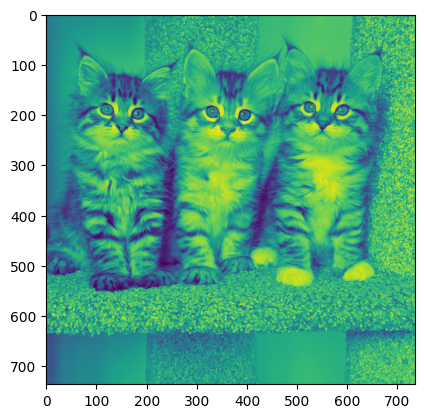

In [5]:
img_gray = cv.imread('/content/drive/MyDrive/PCVK/kitten01.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

In [6]:
plt.imshow(img_gray, cmap='gray')

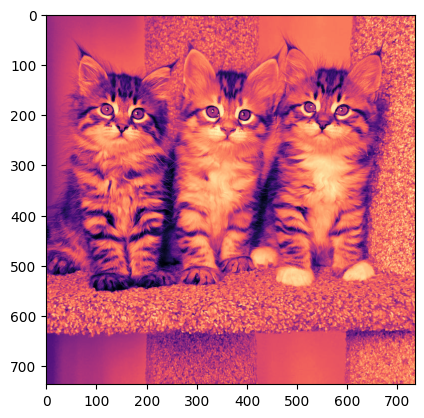

In [7]:
plt.imshow(img_gray, cmap='magma')

In [8]:
img4 = cv.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB), (512, 1024))
plt.imshow(img4)

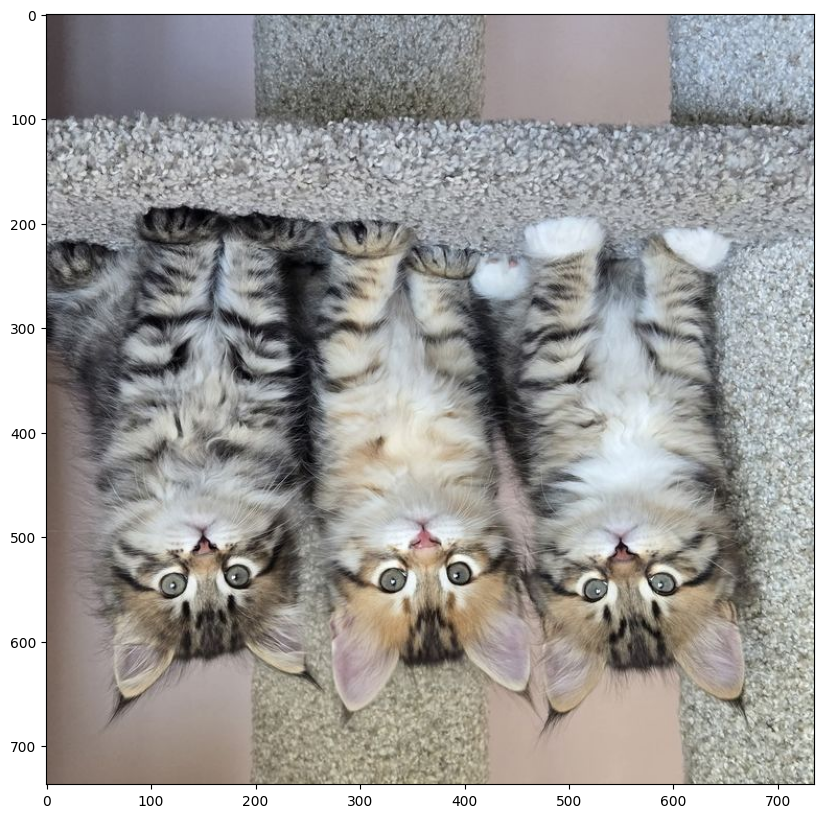

In [26]:
img5 = cv.flip(cv.cvtColor(img, cv.COLOR_BGR2RGB), 0)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
ax1.imshow(img5)

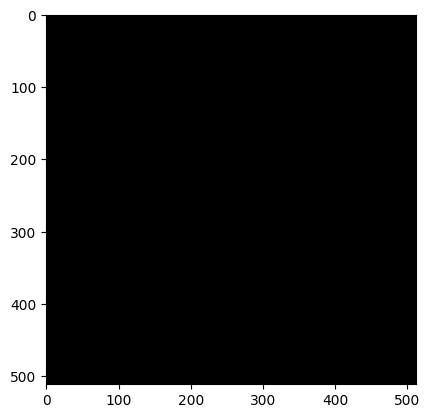

In [11]:
black_img = np.zeros((512, 512, 3), dtype=np.int16)
plt.imshow(black_img)

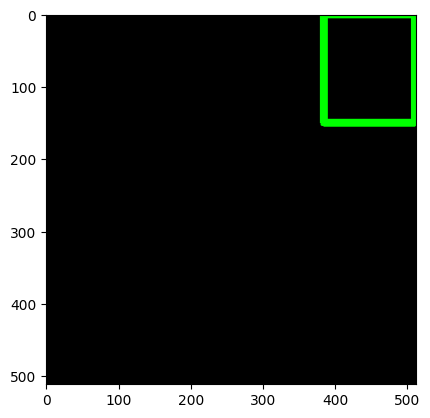

In [12]:
cv.rectangle(black_img, pt1=(384, 0), pt2=(510, 150), color=(0, 255, 0), thickness=10)
plt.imshow(black_img)

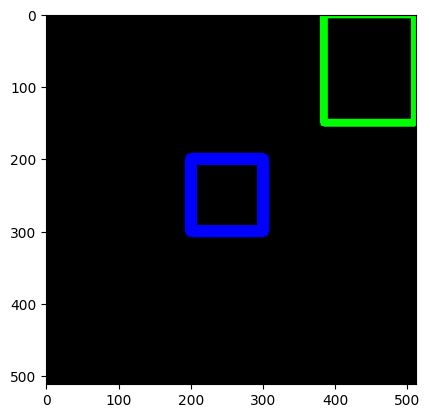

In [13]:
cv.rectangle(black_img, pt1=(200, 200), pt2=(300, 300), color=(0, 0, 255), thickness=15)
plt.imshow(black_img)

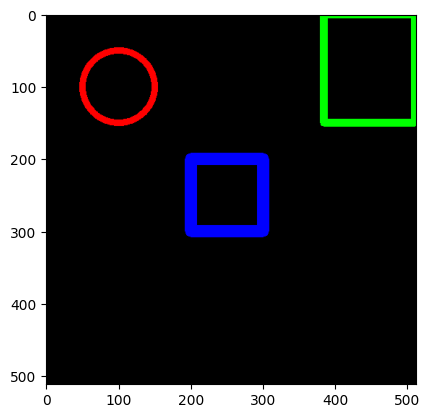

In [14]:
cv.circle(black_img, center=(100, 100), radius=50, color=(255, 0, 0), thickness=8)
plt.imshow(black_img)

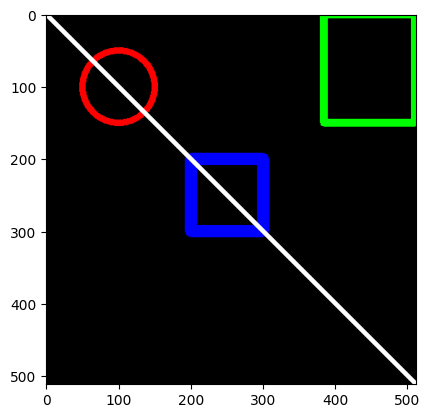

In [15]:
cv.line(black_img, pt1=(0, 0), pt2=(512, 512), color=(255, 255, 255), thickness=5)
plt.imshow(black_img)

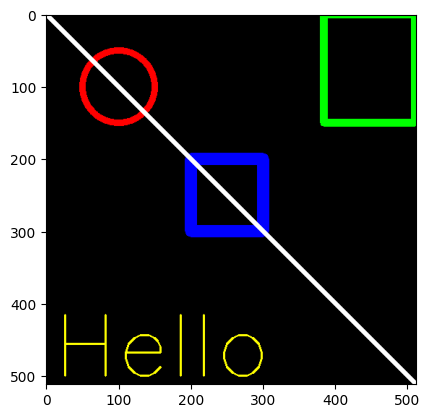

In [16]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_img, text='Hello', org=(10, 500), fontFace=font, fontScale=4, color=(255, 255, 0), thickness=2, lineType=cv.LINE_AA)
plt.imshow(black_img)

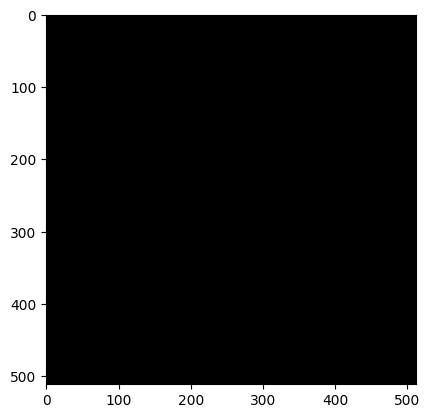

In [18]:
black_img2 = np.zeros((512, 512, 3), dtype=np.int32)
plt.imshow(black_img2)

In [21]:
vertice = np.array([[100, 300], [200, 200], [400, 300], [200, 400]], dtype=np.int32)
vertice

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

In [22]:
pts = vertice.reshape((-1, 1, 2))
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

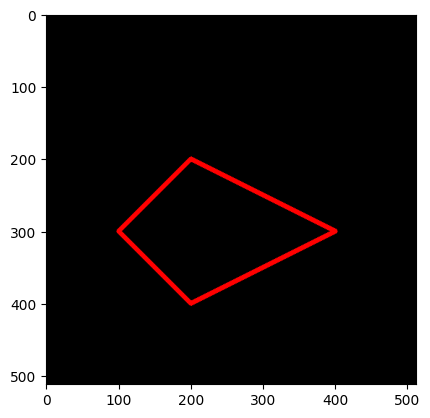

In [23]:
cv.polylines(black_img2, [pts], isClosed=True, color=(255, 0, 0), thickness=5)
plt.imshow(black_img2)

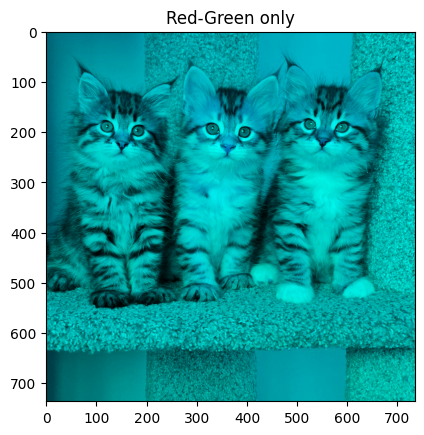

In [32]:
# red-green
RG = cv.merge([np.zeros_like(B), G, R])
plt.imshow(RG)
plt.title("Red-Green only")
plt.show()

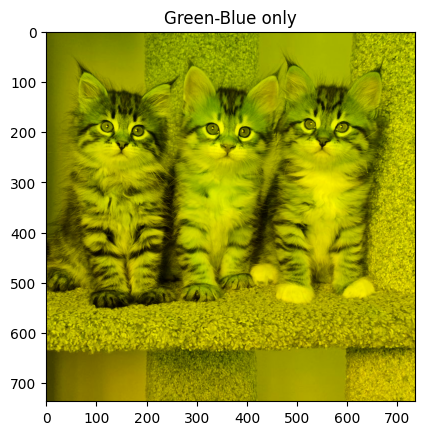

In [31]:
# green-blue
GB = cv.merge([B, G, np.zeros_like(R)])
plt.imshow(GB)
plt.title("Green-Blue only")
plt.show()

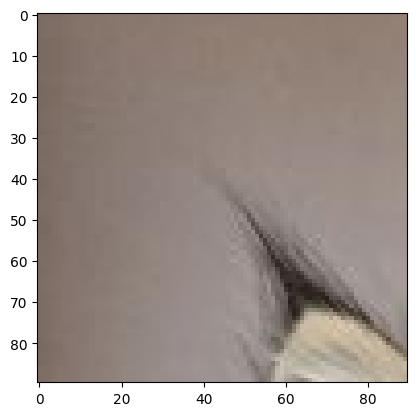

In [41]:
plt.imshow(img3[10:100, 10:100])
plt.show()

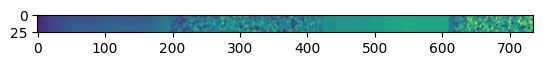

In [53]:
green_channel = img3[5:30, :, 1]
plt.imshow(green_slice)
plt.show()

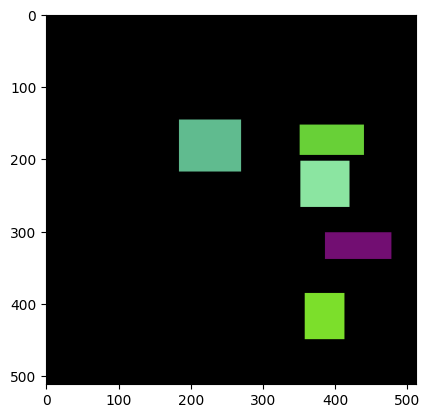

In [75]:
canvas = np.zeros((512, 512, 3), dtype=np.uint8)

for i in range(5):
    pt1 = (np.random.randint(0, 400), np.random.randint(0, 400))
    pt2 = (pt1[0] + np.random.randint(20,100), pt1[1] + np.random.randint(20,100))
    color = (np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256))
    cv.rectangle(canvas, pt1, pt2, color, -1)

plt.imshow(cv.cvtColor(canvas, cv.COLOR_BGR2RGB))
plt.show()

In [82]:
img_upside_down = cv.flip(img3, 0)
plt.imshow(img_upside_down)
plt.show()

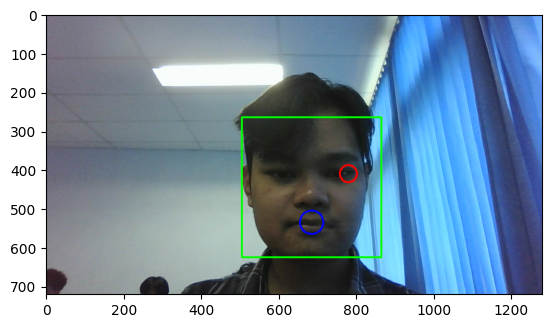

In [88]:
# Load image
face = cv.imread('/content/drive/MyDrive/PCVK/face.jpg')
face_rgb = cv.cvtColor(face, cv.COLOR_BGR2RGB)

# Load Haar cascades (already included in OpenCV)
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_eye.xml")

# Convert to grayscale for detection
gray = cv.cvtColor(face, cv.COLOR_BGR2GRAY)

# Detect face
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in faces:
    # Rectangle around face
    cv.rectangle(face_rgb, (x, y), (x+w, y+h), (0, 255, 0), 3)

    # Detect eyes inside face region
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_rgb[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

    for (ex, ey, ew, eh) in eyes:
        # Circles around eyes
        center = (ex + ew//2, ey + eh//2)
        radius = ew//3
        cv.circle(roi_color, center, radius, (255, 0, 0), 3)

    # Circle on mouth area (approx: lower part of face)
    mouth_center = (x + w//2, y + int(h*0.75))
    cv.circle(face_rgb, mouth_center, 30, (0, 0, 255), 3)

# Show result
plt.imshow(face_rgb)
plt.show()
